In [9]:
import pandas as pd
import numpy as np
import deepchem as dc
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

In [3]:
small_dataset1 = pd.read_pickle('datasets/small_dataset1_CHEMBL1963937.pkl')
small_dataset1.tail()

,smiles,label
2118,COc1ccc(-c2nc3ccccc3s2)cc1,4.500000
2119,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)C(NC(=O)C3CC3c3cc...,4.450000
2120,O=C(O)C1=C(C(=O)O)C2CCC1C2,4.599999
2121,Cc1ccsc1C(=O)Nc1ccc2c(c1)OCCO2,4.550000
2122,COc1cc(OC)cc(C(=O)Nc2ccc3c(c2)OCCO3)c1,4.675000


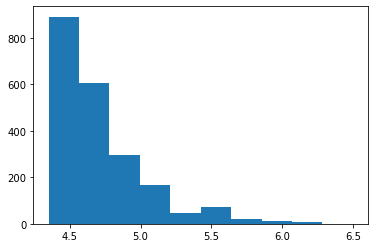

In [4]:
smiles = small_dataset1.smiles.to_numpy()
labels = np.vstack(small_dataset1.label.to_numpy())
plt.hist(labels)
plt.show()

In [5]:
featurizer = dc.feat.CircularFingerprint(radius=2, size=2048)
features = featurizer.featurize(smiles)

In [6]:
disk_dataset = dc.data.DiskDataset.from_numpy(X=features, y=labels, ids=smiles)

In [32]:
transformer = dc.trans.NormalizationTransformer(transform_y=True, dataset=disk_dataset)

In [33]:
disk_dataset_norm = transformer.transform(disk_dataset)

In [38]:
splitter = dc.splits.RandomSplitter()
train, test = splitter.train_test_split(disk_dataset_norm, frac_train=0.833333)
kfold = splitter.k_fold_split(train, k=5)

In [ ]:
for k in kfold:
    untransformed_labels = transformer.untransform(k[1].y)
    plt.hist(untransformed_labels)
    plt.show()

In [47]:
sklearn_random_forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, 
                                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0, bootstrap=True, n_jobs=8, verbose=1)

In [48]:
random_forest = dc.models.SklearnModel(sklearn_random_forest)

In [49]:
random_forest.fit(kfold[0][0])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   12.5s finished


In [73]:
metrics = random_forest.evaluate(dataset=kfold[0][0], metrics=[dc.metrics.mean_squared_error, dc.metrics.r2_score], transformers=[transformer])
mse = metrics['metric-1']
r2 = metrics['metric-2']
print(f'the MSE is {mse} and R2 is {r2}')

the MSE is 0.01380868155885718 and R2 is 0.8585997185056777


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


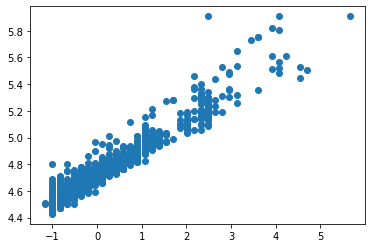

In [85]:
y_pred = random_forest.predict(kfold[0][0], transformers=[transformer])
plt.scatter(x=kfold[0][0].y, y=y_pred)

In [74]:
metrics = random_forest.evaluate(dataset=kfold[0][1], metrics=[dc.metrics.mean_squared_error, dc.metrics.r2_score], transformers=[transformer])
mse = metrics['metric-1']
r2 = metrics['metric-2']
print(f'the MSE is {mse} and R2 is {r2}')

the MSE is 0.11085755374522618 and R2 is 0.07243607854337553


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


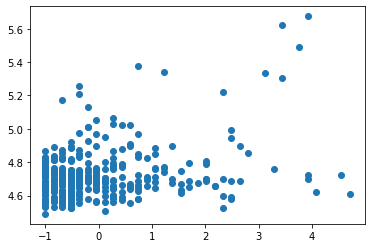

In [87]:
y_pred = random_forest.predict(kfold[0][1], transformers=[transformer])
plt.scatter(x=kfold[0][1].y, y=y_pred)